<a href="https://colab.research.google.com/github/akfnclWkd01/akfnclWkd01.github.io/blob/main/--_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://colab.research.google.com/drive/1Iv40irT-Jw83zk2FB3s1Rp8GEH51ZSFv?hl=ko#scrollTo=YZm503-I_tji

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
# 테스트 데이터셋 로드
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()

    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0243 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.008

In [6]:
print(type(x_test))
print(x_test.shape)
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

<class 'numpy.ndarray'>
(10000, 28, 28)


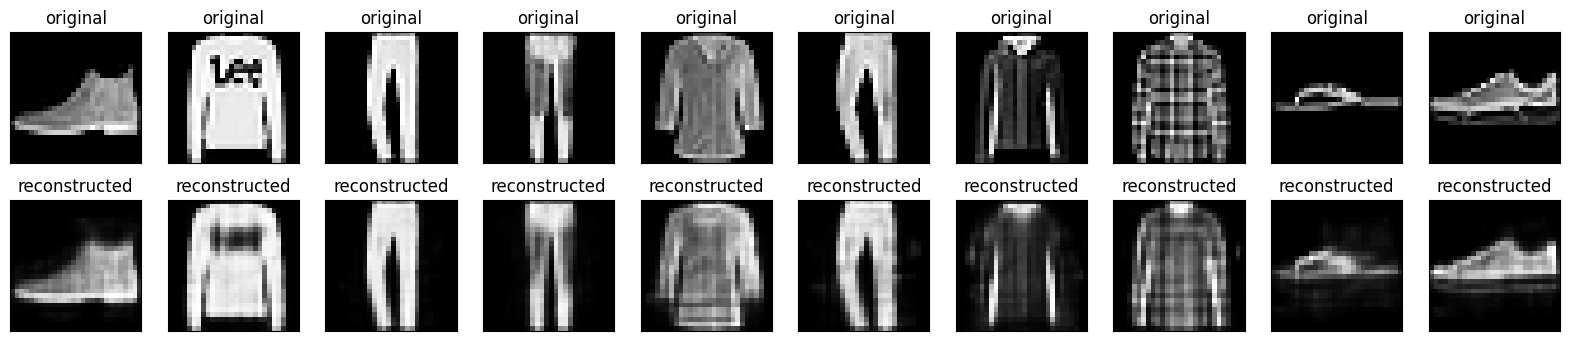

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

---

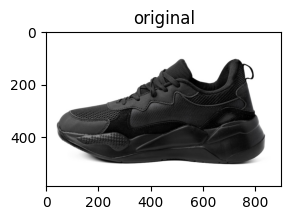

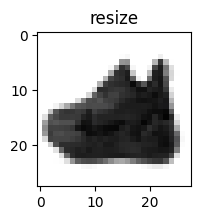

In [8]:
import matplotlib.pyplot as plt
# ------------------------------
# 테스트용 이미지 리사이징
from PIL import Image
import requests
from io import BytesIO

# 인터넷에서 이미지 가져오기(그냥 신발 이미지)
url = 'https://img.freepik.com/free-photo/one-black-sneaker-shoe-isolated-on-white_93675-131266.jpg?w=900&t=st=1705666960~exp=1705667560~hmac=adf8f24b0eb25893b668f699d5205f9d017482c83c8b29a80941c68cc1ed0778'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 인터넷에서 가져온 신발 이미지 그려보기.
plt.figure(figsize=(20, 2))
plt.title("original")
plt.imshow(tf.squeeze(img))
plt.show()


# 인터넷에서 가져온 신발 이미지 그려보기.
img = img.resize((28, 28))  # 이미지 리사이징 (28 * 28))
plt.figure(figsize=(20, 2))
plt.title("resize")
plt.imshow(tf.squeeze(img))
plt.show()

In [ ]:
# https://velog.io/@jaehyeong/OpenCV%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B8%B0%EC%B4%88-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-with-Python
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.1/38.6 MB 36.0 MB/s eta 0:00:02
   -- ------------------------------------- 2.6/38.6 MB 33.2 MB/s eta 0:00:02
   ---- ----------------------------------- 4.5/38.6 MB 35.8 MB/s eta 0:00:01
   ------ --------------------------------- 6.3/38.6 MB 36.7 MB/s eta 0:00:01
   -------- ------------------------------- 8.5/38.6 MB 38.8 MB/s eta 0:00:01
   ----------- ---------------------------- 10.7/38.6 MB 40.9 MB/s eta 0:00:01
   ------------- -------------------------- 12.8/38.6 MB 43.7 MB/s eta 0:00:01
   --------------- ------------------------ 15.3/38.6 MB 50.4 MB/s eta 0:00:01
   ----------------- ---------------------- 16.8/38.6 MB 46.7 MB/s eta 0:00:01
   ------------------- -------------------- 18.6/38.6 MB 43.7 MB/s eta 0:00:01
   -------------------- ------------------- 19.7/38.6 MB 38.5 MB/s eta 0:00:01
   ----------------------- ---------------- 22.4/38.6 MB 38.6 MB/s

<class 'numpy.ndarray'> (28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         

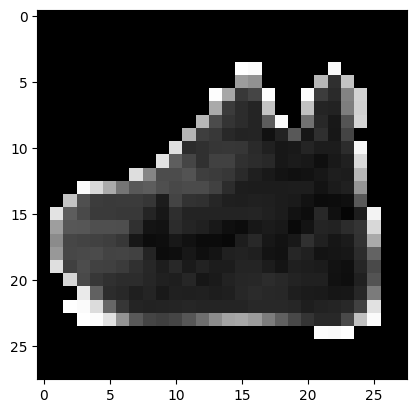

In [10]:
# 이미지 정규화 하기



# 회색조 1채널 히스토그램 (histo_gray.py)
import cv2
import numpy as np
import matplotlib.pylab as plt

url = 'https://img.freepik.com/free-photo/one-black-sneaker-shoe-isolated-on-white_93675-131266.jpg?w=900&t=st=1705666960~exp=1705667560~hmac=adf8f24b0eb25893b668f699d5205f9d017482c83c8b29a80941c68cc1ed0778'

# 이미지 로드
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
img = cv2.imdecode(image_nparray, cv2.IMREAD_GRAYSCALE)

# 이미지 Resize(28, 28)
src = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
src = src.astype('float32') / 255.
print(type(src), src.shape)

for i in range(len(src)):
    for j in range(len(src[i])):
        if src[i][j] == 1:
            src[i][j] = 0
print(src)

# 이미지 출력(원본)
plt.imshow(tf.squeeze(src))
plt.show()

<class 'numpy.ndarray'>
(1, 28, 28)
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.

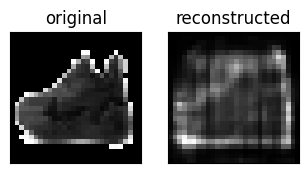

In [11]:
# encoded_imgs = autoencoder.encoder(src).numpy()
# decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# <class 'numpy.ndarray'>
# (10000, 28, 28)

print(type(src))
print(np.reshape(src, ((1, )+src.shape)).shape)
new_src = np.reshape(src, ((1, )+src.shape))
encoded_imgs = autoencoder.encoder(new_src).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

print(new_src)
print(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))

# display original
ax = plt.subplot(2, n, 1)
plt.imshow(new_src[0])
plt.title("original")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display recover
ax = plt.subplot(2, n, 2)
plt.imshow(decoded_imgs[0])
plt.title("reconstructed")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:



# 회색조 1채널 히스토그램 (histo_gray.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 그레이 스케일로 읽기 및 출력
img = cv2.imread('../img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) #--④ 히스토그램 총 합계와 이미지의 크기
plt.show()